# Temel Bileşen Analizi(PCA)
* Temel fikir, çok değişkenli verinin ana özelliklerini daha az sayıda değşken bileşen ile temsil etmektir.
* diğer bir ifade ile küçük miktarda bir bilgi kaybını göze alıp değişken boyutunu azaltmaktır.
* Eğer elinizdeki 100 değişkenden ve gözlem birimlerinden oluşan veri setini kümeleme yöntemiyle kümeledikten sonra kümeleri görselleştirmek istiyorsanız, veri setinizi temel bileşenler analizi ile iki boyuta indirgeyip yaklaşımı görselleştirebilirsiniz.
----
* Temel bileşenler analizi genel olarak, görüntü işleme ve regresyon modellerinde ortaya çıkan bazı problemlerde kullanılmaktadır. Özellikle regresyon modellerinde veri setinde çok fazla değişken olduğunda, değişkenlerden bazıları birbiri ile ilişkili is oraya çoklu doğrusal bağlantı problemi çıkmaktadır.
* Çoklu doğrusal bağlantı problemlerinden kurtulmak için bir PCA uygulandığında değişkenler arasında çoklu doğrusal bağlantı problemi ortadan kalkabilir.
* İndirgeme işleminden sonra ortaya çıkan bileşenler arasında korelasyon yoktur ! 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

PCA uygulama

In [3]:
df = pd.read_csv('Hitters.csv')
df.dropna(inplace = True)
df = df._get_numeric_data()
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,632,43,10,475.0
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,880,82,14,480.0
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,200,11,3,500.0
4,321,87,10,39,42,30,2,396,101,12,48,46,33,805,40,4,91.5
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,282,421,25,750.0


In [4]:
from sklearn.preprocessing import StandardScaler

In [5]:
df =StandardScaler().fit_transform(df)

In [8]:
df[0:5,0:5]

array([[-0.6029005 , -0.59567545, -0.5285512 , -1.2061115 , -0.52206292],
       [ 0.51254171,  0.49225957,  0.72996619,  0.44151497,  0.79405962],
       [ 0.62816682,  0.73648988,  0.95878753,  0.40228577,  1.02631654],
       [-0.56209164, -0.46245892, -0.18531919, -0.61767348, -0.36722498],
       [ 1.29471156,  1.35816704, -0.87178322,  0.75534858, -0.0188396 ]])

In [9]:
from sklearn.decomposition import PCA

In [11]:
pca = PCA(n_components=2)

In [12]:
pca_fit = pca.fit_transform(df)

In [13]:
bilesen_df = pd.DataFrame(data = pca_fit, columns= ['birinci_bilesen', 'ikinci_bilesen'])

In [14]:
bilesen_df

,birinci_bilesen,ikinci_bilesen
0,0.076848,1.653525
1,0.337127,-2.320560
2,3.408362,0.755757
3,-2.642221,-0.361486
4,1.071681,-1.511674
...,...,...
258,-0.152111,-0.331665
259,3.241373,-0.391942
260,-1.206322,-0.625714
261,2.084856,-2.059851


In [18]:
pca.explained_variance_ratio_

array([0.45245466, 0.24246801])

In [20]:
pca.components_[1]

array([-0.38407792, -0.37764493, -0.22866298, -0.37459128, -0.31026531,
       -0.23115759,  0.26820405,  0.19641268,  0.18589726,  0.13386448,
        0.17692929,  0.17283361,  0.19698297, -0.16295204, -0.17624626,
       -0.20978299, -0.05452611])

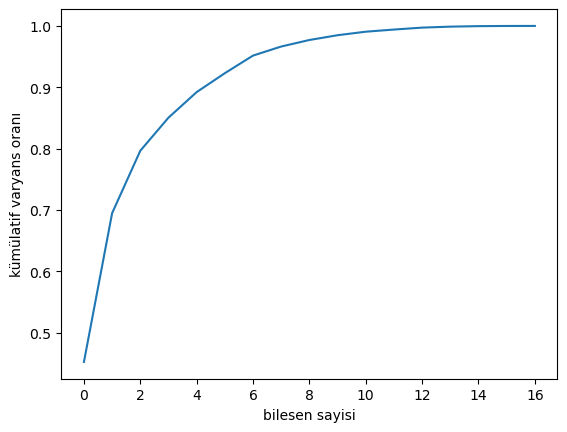

In [23]:
## Optimum bilesen sayisi
pca = PCA().fit(df)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('bilesen sayisi')
plt.ylabel('kümülatif varyans oranı');

final

In [26]:
pca = PCA(n_components=3)
pca_fit = pca.fit_transform(df)

In [27]:
pca.explained_variance_ratio_

array([0.45245466, 0.24246801, 0.1016968 ])